<a href="https://colab.research.google.com/github/tjdudgml3/ms_aischool/blob/main/sklearn_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [7]:
from sklearn.datasets import load_boston

In [8]:
boston = load_boston()

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
data = boston.data
label = boston.target
columns = boston.feature_names

In [13]:
data =pd.DataFrame(data,columns = columns)

In [14]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
data.shape

(506, 13)

In [16]:
#Simple Linear Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,random_state=2022) 

In [20]:
X_train['RM'].values

array([7.454, 6.315, 6.382, 5.942, 8.247, 6.604, 5.414, 7.148, 6.525,
       6.38 , 5.683, 5.871, 6.8  , 6.162, 6.101, 6.122, 6.12 , 7.041,
       7.765, 6.606, 6.631, 6.012, 6.781, 5.927, 6.152, 6.376, 6.749,
       6.301, 5.88 , 6.174, 5.856, 6.333, 6.415, 7.61 , 6.182, 5.935,
       6.86 , 6.461, 7.691, 7.686, 6.826, 5.888, 5.277, 6.556, 5.99 ,
       6.824, 6.142, 5.895, 6.219, 7.024, 8.704, 6.216, 8.259, 6.031,
       6.728, 6.286, 7.274, 6.358, 6.153, 6.144, 5.565, 5.949, 6.474,
       7.393, 6.326, 5.987, 6.975, 6.727, 6.421, 5.747, 5.762, 3.863,
       6.047, 6.437, 6.202, 7.287, 6.108, 5.468, 5.869, 6.395, 6.02 ,
       5.663, 6.245, 6.066, 6.164, 4.973, 7.185, 6.482, 6.595, 5.879,
       6.405, 6.009, 6.417, 5.878, 5.713, 6.655, 5.822, 6.431, 6.563,
       6.03 , 5.854, 5.936, 7.163, 6.24 , 6.727, 6.433, 6.015, 5.594,
       6.319, 6.453, 5.983, 6.373, 7.236, 6.976, 7.412, 6.438, 6.14 ,
       6.112, 6.625, 5.813, 5.807, 6.113, 6.251, 6.037, 6.739, 5.57 ,
       6.114, 6.021,

In [24]:
X_train['RM'].values.reshape(-1, 1)[:5]

array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

In [25]:
from sklearn.linear_model import LinearRegression
simple_linearregression = LinearRegression()

In [28]:
simple_linearregression.fit(X_train['RM'].values.reshape(-1,1),y_train)

LinearRegression()

In [31]:
y_pred = simple_linearregression.predict(X_test['RM'].values.reshape(-1,1))

In [32]:
from sklearn.metrics import r2_score 

In [42]:
print('단순 선형 회기 r2 : {:.2f}'.format(r2_score(y_test,y_pred)))

단순 선형 회기 r2 : 0.21


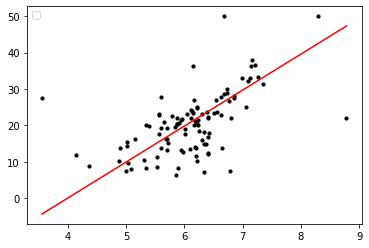

In [48]:
#결과 시각화하기

line_x = np.linspace(np.min(X_test['RM']), np.max(X_test["RM"]),10)
line_y = simple_linearregression.predict(line_x.reshape(-1,1))
plt.scatter(X_test[ 'RM' ], y_test, s = 10, c= 'black')
plt.plot(line_x, line_y, c  = 'red' )
plt.legend('regressionline', 'Test data Sample', loc = 'upper left')

In [49]:
#multiple linear regression
mul_lr = LinearRegression()

In [50]:
mul_lr.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred_mul = mul_lr.predict(X_test)

In [54]:
print("다중 선형 회기 R2  : {:.4f}".format(r2_score(y_test,y_pred_mul)))

다중 선형 회기 R2  : 0.6226


In [96]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth = 3)


In [97]:
dt_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)

DecisionTreeRegressor(max_depth=3)

In [98]:
y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

In [99]:
print(f"단순결정트리 회기 R2 : {r2_score(y_test,y_pred)}")

단순결정트리 회기 R2 : 0.39313966854713644


In [142]:
dt_regr = DecisionTreeRegressor(max_depth = 8)
dt_regr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [143]:
y_pred = dt_regr.predict(X_test)

In [144]:
print("다중결정트리 R2: {:.4f}".format(r2_score(y_test, y_pred)))

다중결정트리 R2: 0.7424


In [180]:
#support vector machne
from sklearn.svm import SVR
svm_regr = SVR( C = 2)

In [181]:
svm_regr.fit(X_train["RM"].values.reshape(-1,1),y_train)

SVR(C=2)

In [182]:
y_pred = svm_regr.predict(X_test['RM'].values.reshape(-1,1))
print("단순 서포트벡터머신 회기 R2: {:.4f}".format(r2_score(y_test,y_pred)))

단순 서포트벡터머신 회기 R2: 0.4202


In [183]:
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']),100)

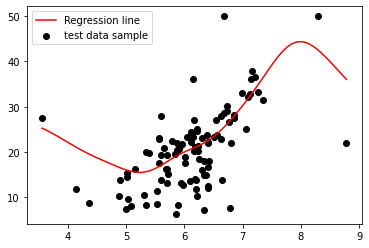

In [184]:
line_y = svm_regr.predict(line_x.reshape(-1,1))
plt.scatter(X_test["RM"], y_test, c= 'black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line','test data sample'], loc = 'upper left')

In [207]:
svm_regr = SVR( C = 100000 )
svm_regr.fit(X_train, y_train)

SVR(C=100000)

In [208]:
y_pred = svm_regr.predict(X_test)

In [209]:
print("단순 서포트벡터머신 회기 R2: {:.4f}".format(r2_score(y_test,y_pred)))

단순 서포트벡터머신 회기 R2: 0.7588
